# This notebook is an introduction to tensorts in TensorFlow framework

We will work on this image:   
https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png  


Please download to your local system

In [10]:
from skimage import io
import cv2 #if can't find then "pip install opencv-python"
from cv2 import cvtColor
import numpy as np
import math
import matplotlib.pyplot as plt

In [83]:
np.random.seed(42)

### Load the image

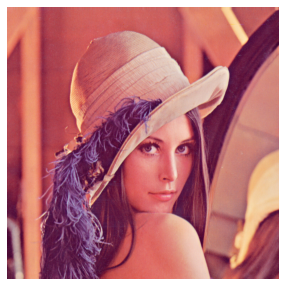

In [79]:
img = io.imread('images/Lena.png')

plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(img)

### Convert the image to gray scale and rotate

In [80]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('images/LenaGray.png', imgGray)

In [16]:
# convert image to matrix:
imgMat = []
for i in range(0, imgGray.shape[0]):
    row = []
    for j in range(0, imgGray.shape[1]):
        pixel = imgGray.item(i, j)
        row.append(pixel)
    imgMat.append(row)

In [20]:
imgMat = np.array(imgMat)
imgMatT = imgMat.T
#cv2.imwrite('images/LenaGrayT.png', imgMatT)

True

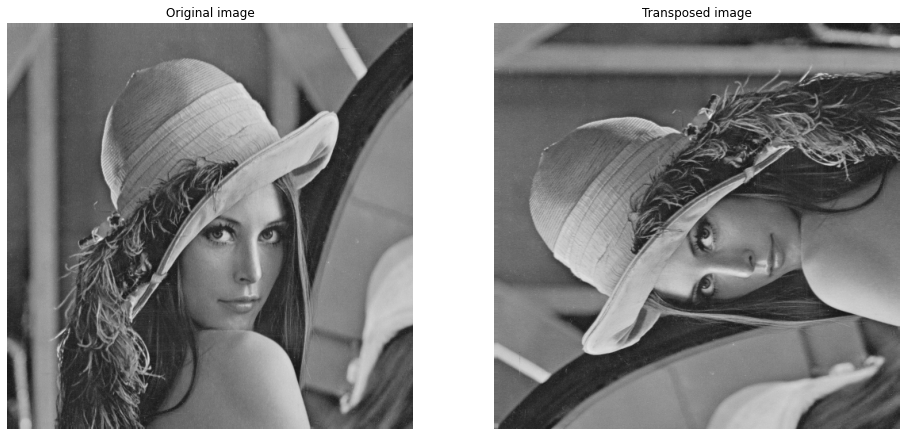

In [22]:
fig = plt.figure(figsize=(16, 25))
original = cv2.imread('images/LenaGray.png')
transposed = cv2.imread('images/LenaGrayT.png')
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(original)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Transposed image')
ax2.imshow(transposed)

### Setup the convolution

In [42]:
def convolution(img, filter):
    # massage the shape of the filter to what we need:
    filter = np.flipud(np.fliplr(filter))
    # initialize convolution output:
    result = np.zeros_like(img)

    # add zero padding to the input:
    imgPadded = np.zeros((img.shape[0] + 2, img.shape[1] + 2))
    imgPadded[1:-1, 1:-1] = img

    # iterate over every pixel of the image:
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            # element-wise multiplication of the kernel and the image
            result[y, x]=(filter * imgPadded[y: y+3, x: x+3]).sum()

    return result

In [77]:
identityKernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
sharpenKernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
edgeDetectionKernel1 = np.array([[-1, -1, -1], [-1, 4, -1],[-1, -1, -1]])
edgeDetectionKernel2 = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])
blurKernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
blurGaussianKernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0
sobelKernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
outlineKernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
deblurKernel = np.array([[0, 2, 0], [2, 4, 2], [0, -2, 0]])

### Perform convolution

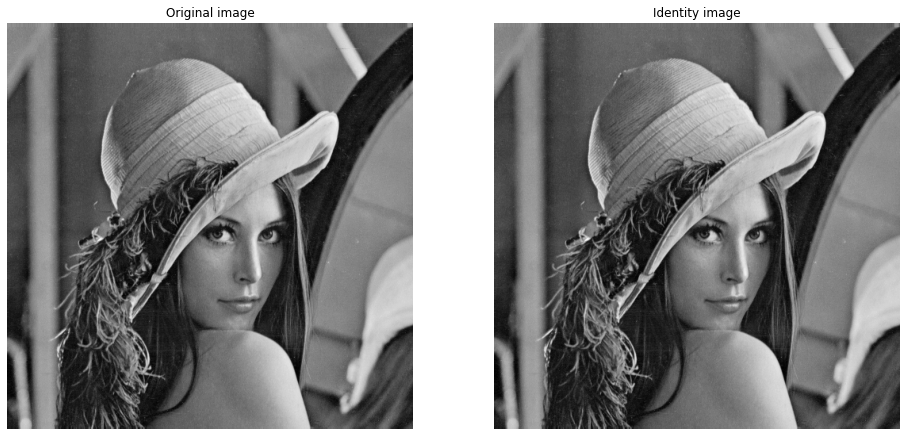

In [51]:
convolutedImg = convolution(imgGray, filter=identityKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Identity image')
ax2.imshow(convolutedImg, cmap="gray")

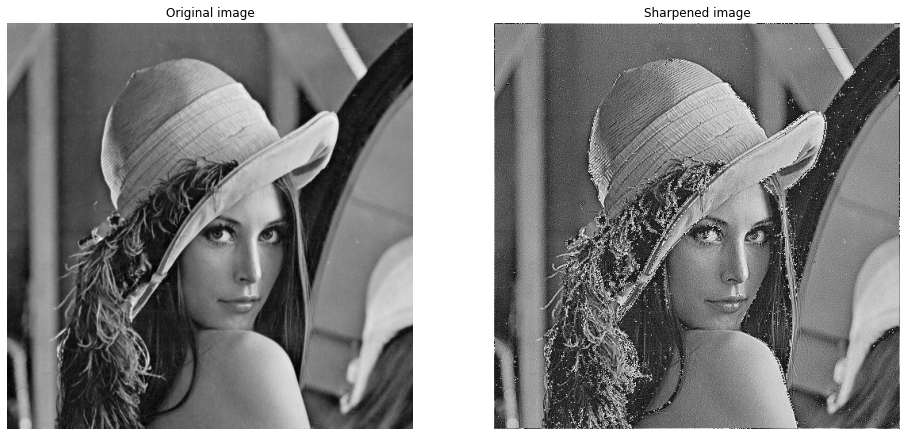

In [44]:
convolutedImg = convolution(imgGray, filter=sharpenKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Sharpened image')
ax2.imshow(convolutedImg, cmap="gray")

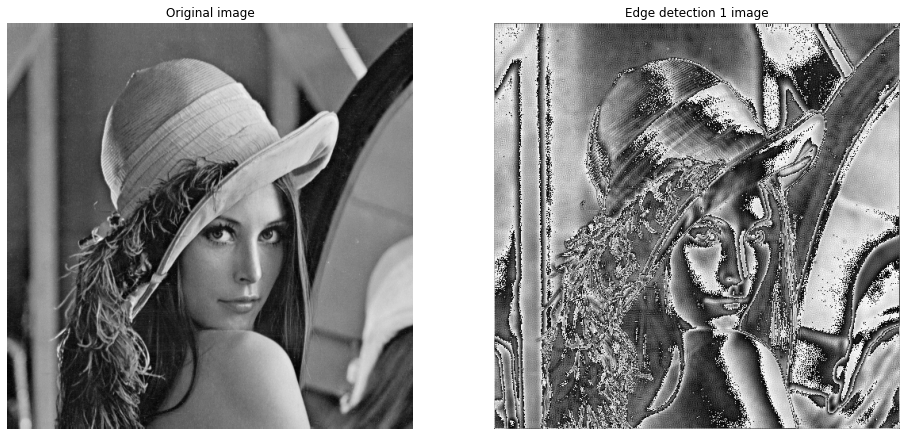

In [45]:
convolutedImg = convolution(imgGray, filter=edgeDetectionKernel1)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Edge detection 1 image')
ax2.imshow(convolutedImg, cmap="gray")

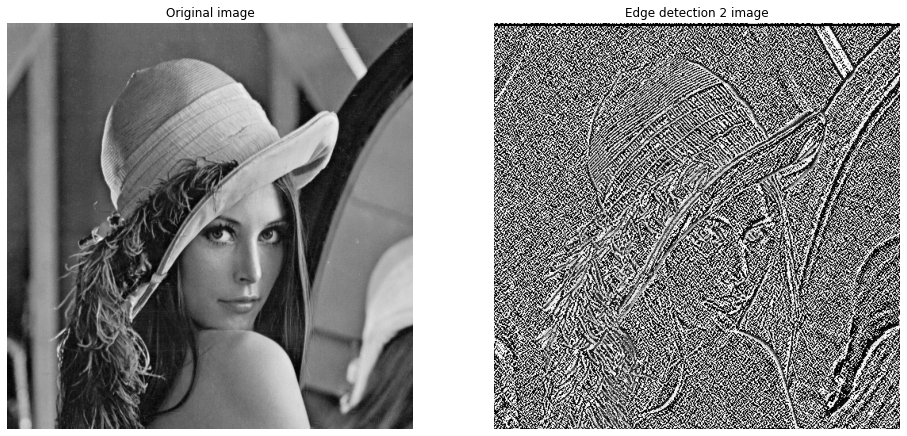

In [46]:
convolutedImg = convolution(imgGray, filter=edgeDetectionKernel2)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Edge detection 2 image')
ax2.imshow(convolutedImg, cmap="gray")

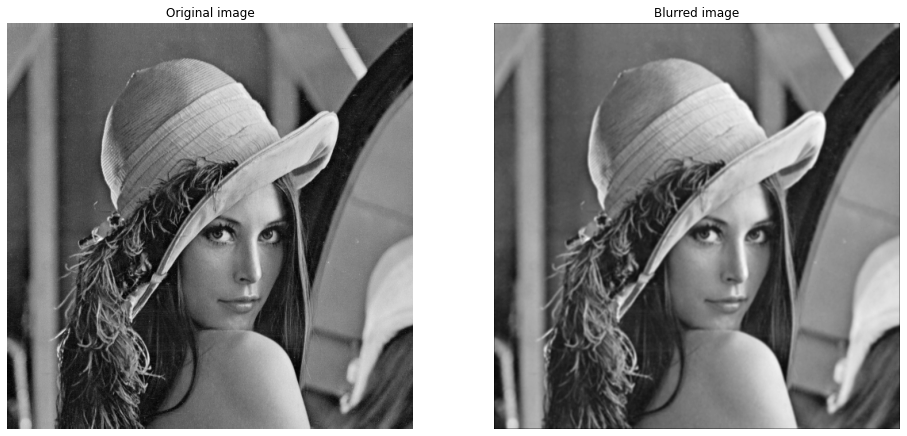

In [47]:
convolutedImg = convolution(imgGray, filter=blurKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Blurred image')
ax2.imshow(convolutedImg, cmap="gray")

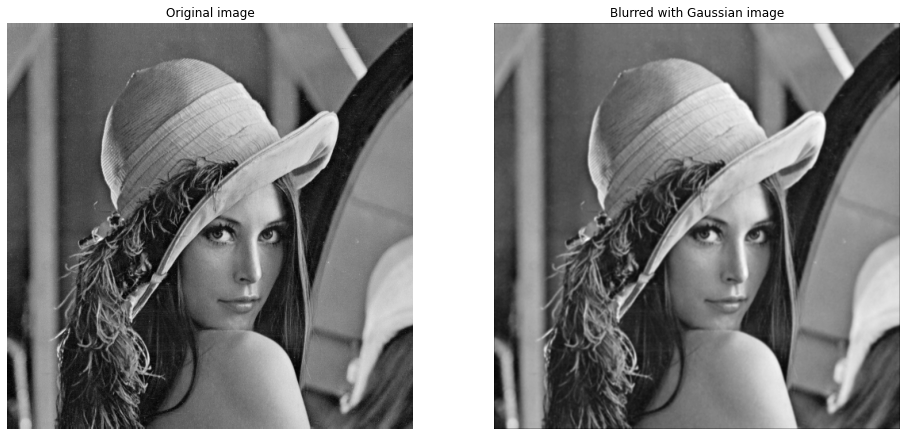

In [48]:
convolutedImg = convolution(imgGray, filter=blurGaussianKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Blurred with Gaussian image')
ax2.imshow(convolutedImg, cmap="gray")

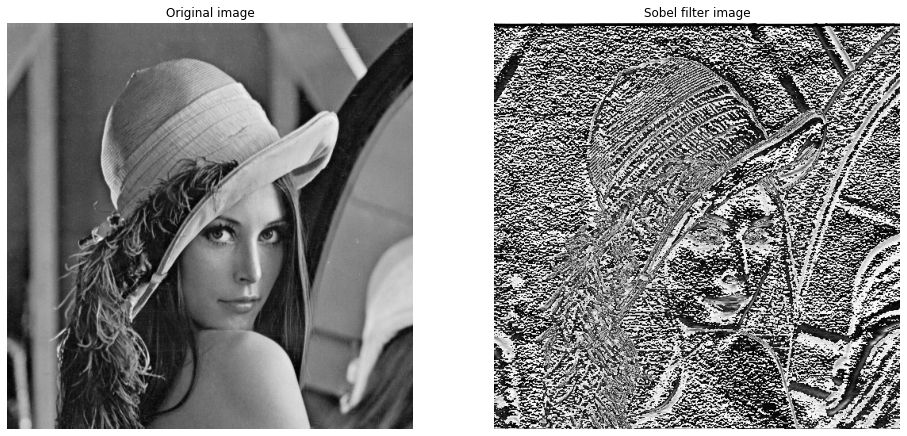

In [54]:
convolutedImg = convolution(imgGray, filter=sobelKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Sobel filter image')
ax2.imshow(convolutedImg, cmap="gray")

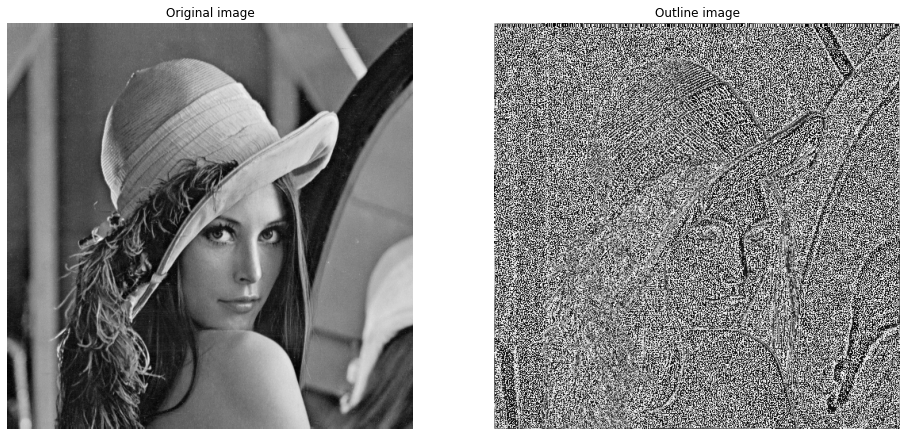

In [56]:
convolutedImg = convolution(imgGray, filter=outlineKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Outline image')
ax2.imshow(convolutedImg, cmap="gray")

## We do not need to write our own convolution function

In [60]:
from scipy.ndimage.filters import convolve

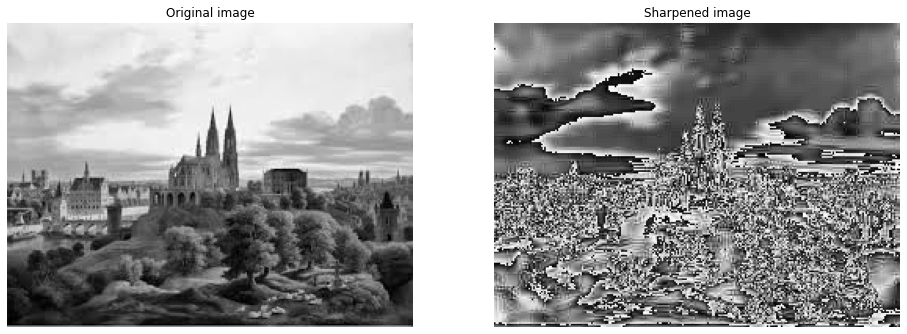

In [62]:
img = io.imread('images/castle.jpeg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

convolutedImg = convolve(imgGray, edgeDetectionKernel1)  #notice we use convolve function here

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Edge detection 1 image')
ax2.imshow(convolutedImg, cmap="gray")

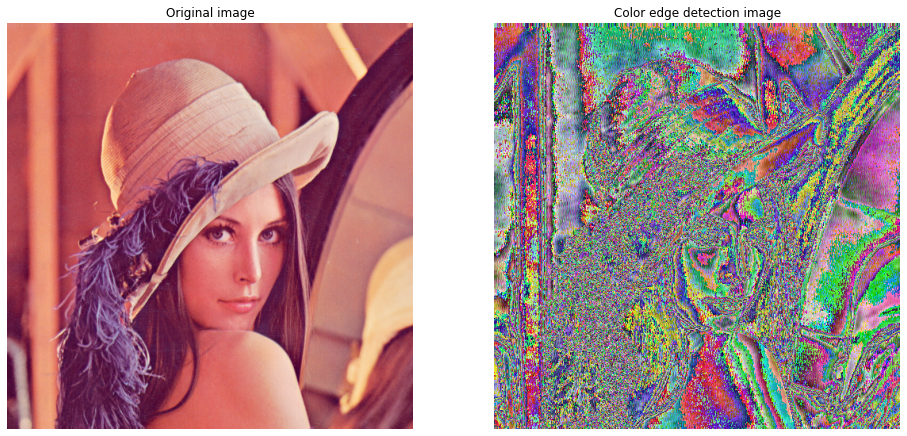

In [74]:
# We can expand to multi-channel images:
edgeDetectionKernel3channel = np.array([[[-1, -1, -1], [-1, 4, -1],[-1, -1, -1]],
                                  [[-1, -1, -1], [-1, 4, -1],[-1, -1, -1]],
                                  [[-1, -1, -1], [-1, 4, -1],[-1, -1, -1]]])

img = io.imread('images/Lena.png')

convolutedImg = convolve(img, edgeDetectionKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Color edge detection image')
ax2.imshow(convolutedImg, cmap="gray")

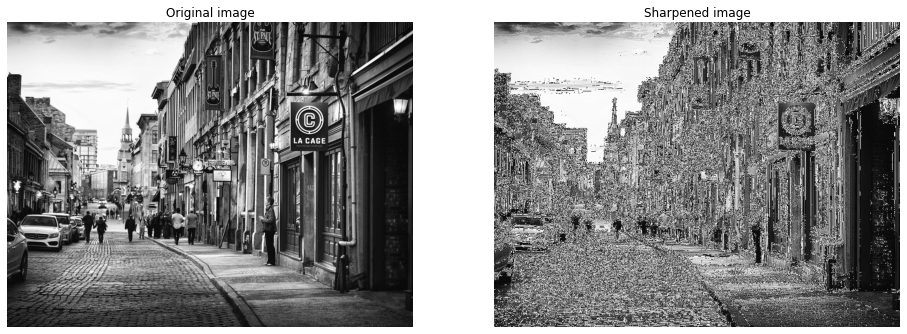

In [82]:
img = io.imread('images/street.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

convolutedImg = convolve(imgGray, sharpenKernel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(imgGray, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Sharpened image')
ax2.imshow(convolutedImg, cmap="gray")